<a href="https://colab.research.google.com/github/SohilaOsama/eicu-code/blob/master/GraduationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1-Import Libraries:**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols

**2-Load Data**

In [2]:
data = pd.read_csv('/content/data01.csv')

**3-Dataset Information & Drop Unnessecry Data**

In [3]:
data.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.65,0.40,13.3,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.10,0.55,24.5,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.80,0.15,14.5,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [4]:
data.drop(['group', 'ID'], axis = 1, inplace = True)

In [5]:
data.shape

(1177, 49)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   outcome                   1177 non-null   int64  
 1   age                       1177 non-null   int64  
 2   gendera                   1177 non-null   int64  
 3   BMI                       962 non-null    float64
 4   hypertensive              1177 non-null   int64  
 5   atrialfibrillation        1177 non-null   int64  
 6   CHD with no MI            1177 non-null   int64  
 7   diabetes                  1177 non-null   int64  
 8   deficiencyanemias         1177 non-null   int64  
 9   depression                1177 non-null   int64  
 10  Hyperlipemia              1177 non-null   int64  
 11  Renal failure             1177 non-null   int64  
 12  COPD                      1177 non-null   int64  
 13  heart rate                1164 non-null   float64
 14  Systolic

In [7]:
data.describe()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1164.000000,1161.000000,1161.000000,1164.000000,1158.000000,1164.000000,1141.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1033.000000,918.000000,1032.000000,1157.000000,1157.000000,1177.000000,1012.000000,1177.000000,1177.000000,1159.000000,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,0.135089,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,0.338997,0.118946,0.379779,0.365336,0.075616,84.575848,117.995035,59.534497,20.801511,36.677286,96.272900,1899.276512,31.914014,3.575010,29.539939,32.864327,89.903812,15.952129,10.712948,241.504323,80.113544,0.405569,12.233024,17.481057,1.625465,11014.130912,246.778456,1.642846,36.298423,148.796531,4.176646,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.341964,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,0.473570,0.323863,0.485538,0.481729,0.264495,16.018701,17.367618,10.684681,4.002987,0.607558,2.298002,1272.363631,5.202102,0.626835,2.619054,1.402302,6.532629,2.131643,5.229402,113.120623,11.133243,0.465007,8.632807,7.386988,0.834038,13148.664625,1484.522810,1.279651,21.851545,51.494256,0.414836,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,2.030000,18.125000,27.825000,62.600000,12.088889,0.100000,9.571429,5.000000,0.100000,0.966667,10.100000,0.871429,50.000000,8.000000,0.266667,5.357143,66.666667,3.000000,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.371250,105.391304,52.173913,17.925694,36.286045,95.000000,980.000000,28.160000,3.120000,28.250000,32.011111,86.250000,14.460000,7.440000,168.909091,74.775000,0.200000,6.650000,13.160000,1.140000,2251.000000,46.000000,0.940000,20.833333,113.937500,3.900000,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.800000,3.490000,29.750000,32.985714,90.000000,15.506250,9.680000,222.666667,82.466667,0.300000,10.475000,14.633333,1.300000,5840.000000,89.250000,1.287500,30.666667,136.400000,4.115385,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,95.907143,128.625000,65.464286,23.391200,37.021991,97.917500,2500.000000,35.012500,3.900000,31.240000,33.825000,93.857143,16.937500,12.740000,304.250000,87.450000,0.500000,15.462500,18.800000,1.736364,14968.000000,185.187500,1.900000,45.250000,169.500000,4.400000,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,29.875000,2.200000,50.585784,55.000000
max,1.000000,99.000000,2.000000,10

**4-Missing Values**

In [8]:
data.isnull().sum()

outcome                       0
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophils                   259
Lymphocyte                  145
PT      

In [9]:
data['BMI'].fillna(data['BMI'].mean(), inplace = True)


data['heart rate'].fillna(data['heart rate'].mean(), inplace = True)
data['Systolic blood pressure'].fillna(data['Systolic blood pressure'].mean(), inplace = True)
data['Diastolic blood pressure'].fillna(data['Diastolic blood pressure'].mean(), inplace = True)
data['Respiratory rate'].fillna(data['Respiratory rate'].mean(), inplace = True)
data['SP O2'].fillna(data['SP O2'].mean(), inplace = True)
data['Urine output'].fillna(data['Urine output'].mean(), inplace = True)
data['Neutrophils'].fillna(data['Neutrophils'].mean(), inplace = True)
data['Basophils'].fillna(data['Basophils'].mean(), inplace = True)
data['Lymphocyte'].fillna(data['Lymphocyte'].mean(), inplace = True)
data['PT'].fillna(data['PT'].mean(), inplace = True)
data['INR'].fillna(data['INR'].mean(), inplace = True)
data['Creatine kinase'].fillna(data['Creatine kinase'].mean(), inplace = True)
data['glucose'].fillna(data['glucose'].mean(), inplace = True)
data['Blood calcium'].fillna(data['Blood calcium'].mean(), inplace = True)
data['PH'].fillna(data['PH'].mean(), inplace = True)
data['Lactic acid'].fillna(data['Lactic acid'].mean(), inplace = True)
data['PCO2'].fillna(data['PCO2'].mean(), inplace = True)
data['temperature'].fillna(data['temperature'].mean(), inplace = True)

print(data.isnull().sum())

outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP 

**5-Data Analysis**

In [10]:
sns.set_style('darkgrid')
sns.set_palette('coolwarm')

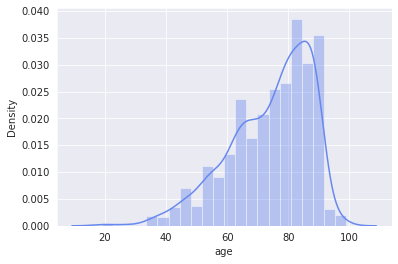

In [11]:
sns.distplot(data['age'])

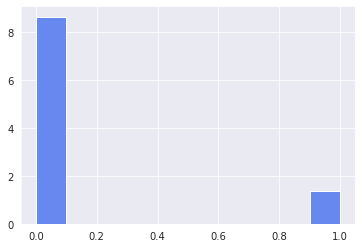

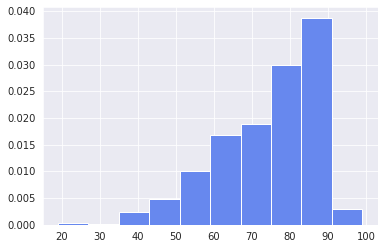

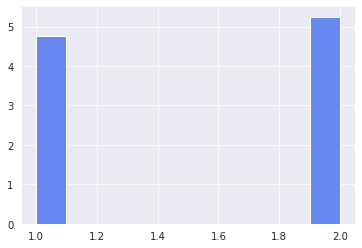

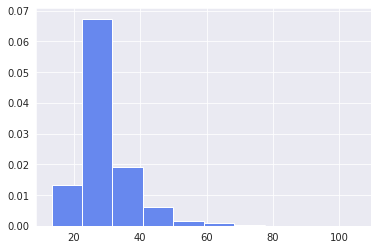

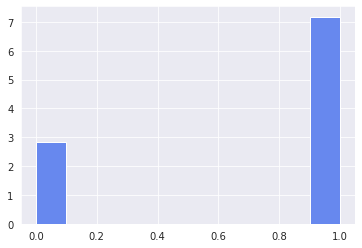

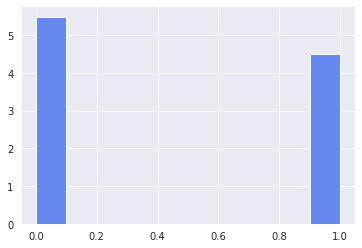

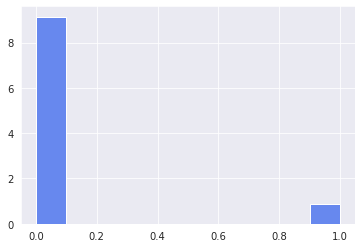

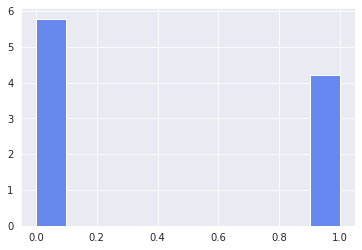

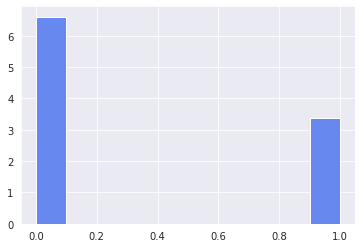

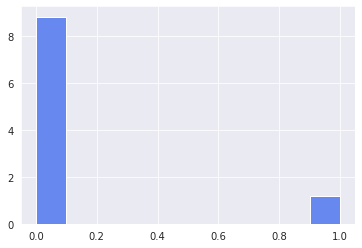

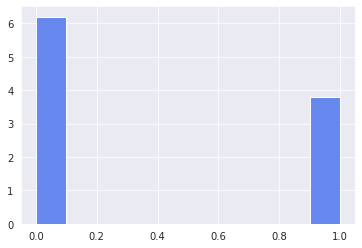

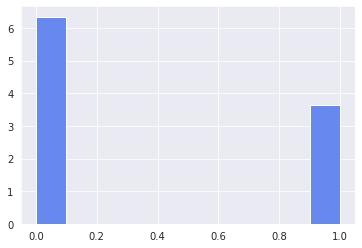

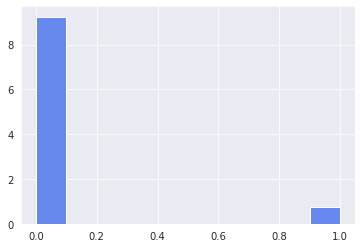

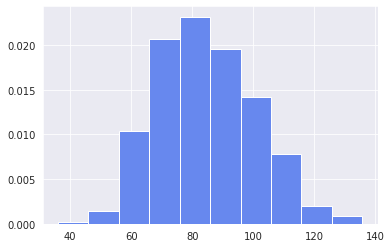

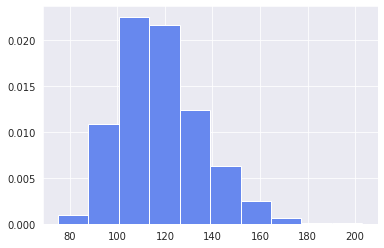

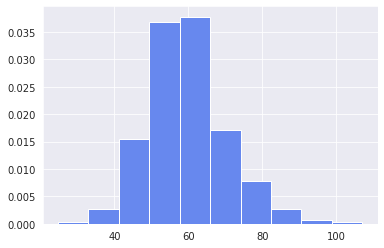

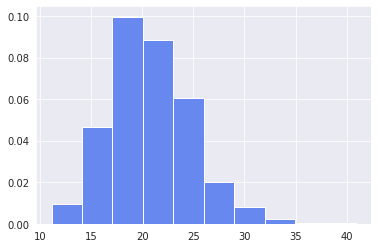

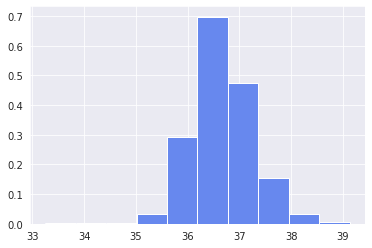

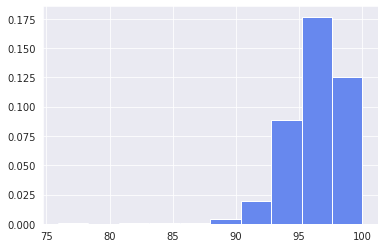

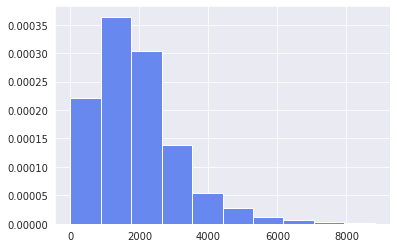

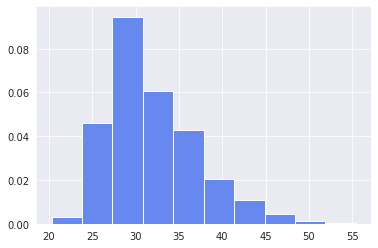

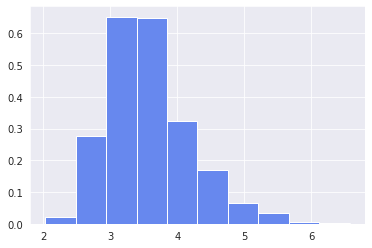

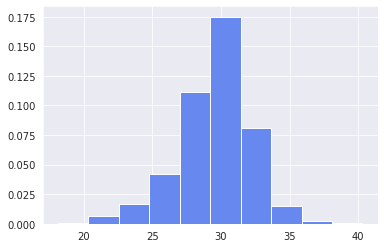

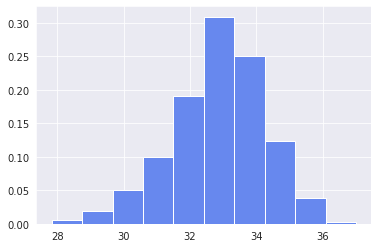

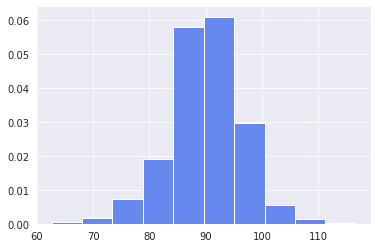

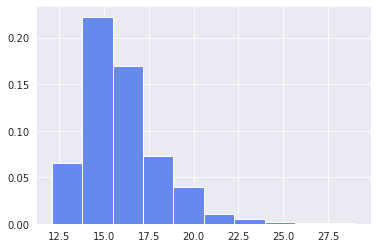

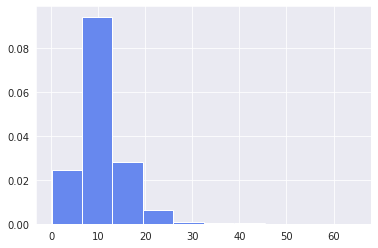

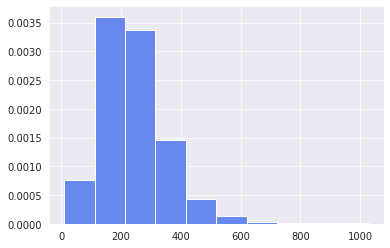

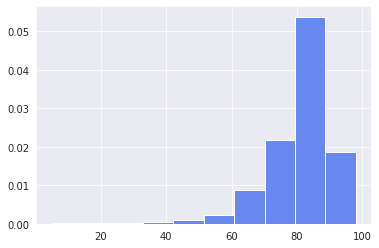

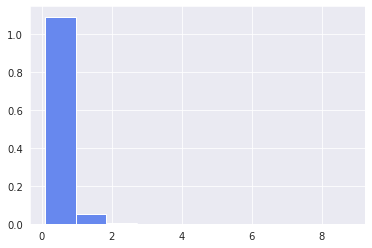

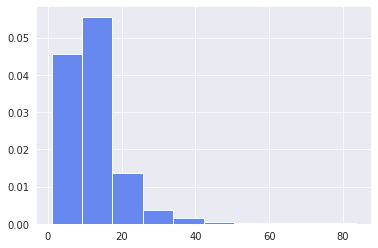

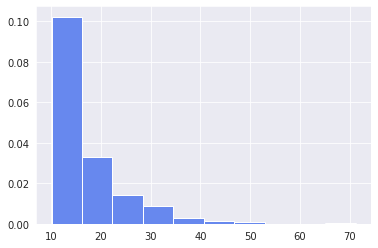

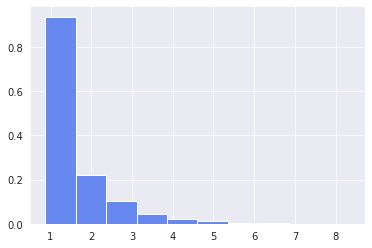

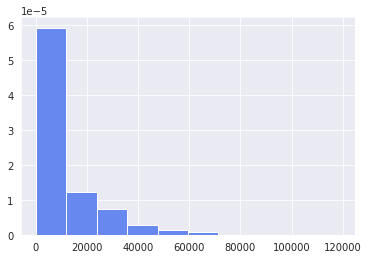

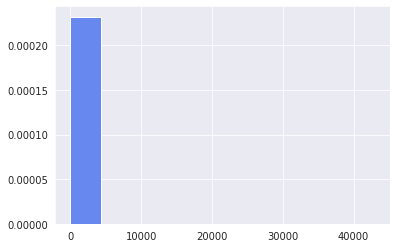

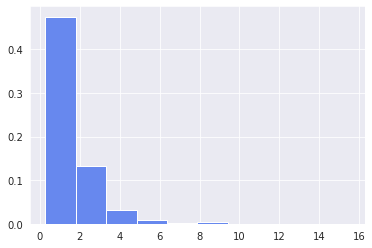

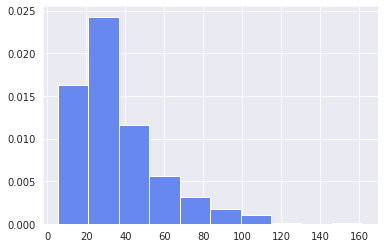

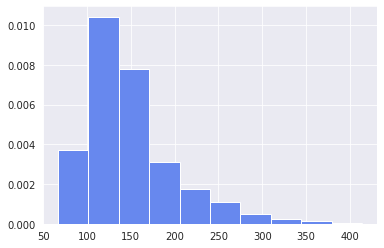

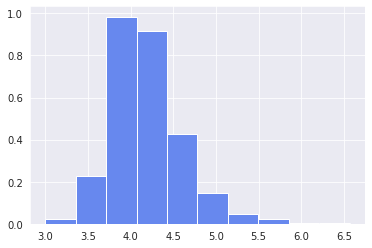

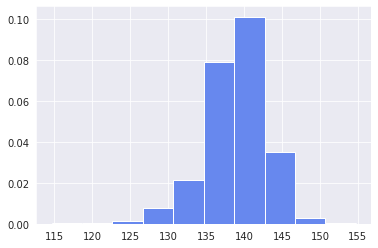

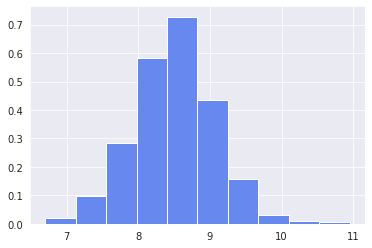

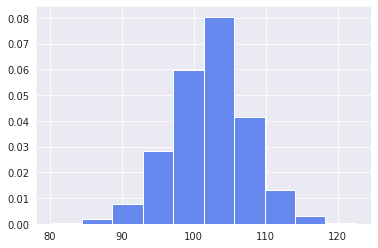

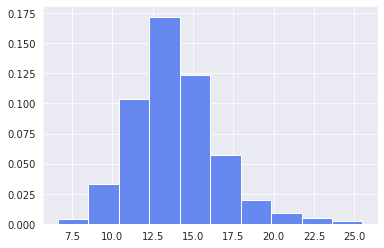

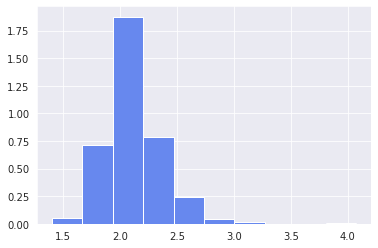

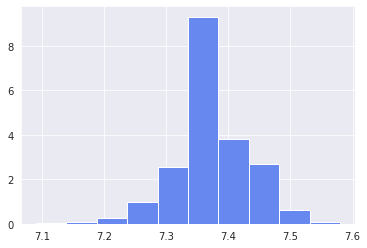

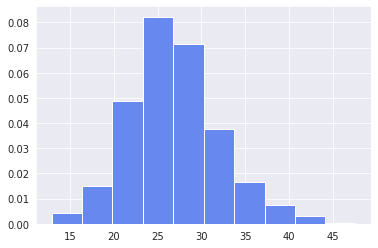

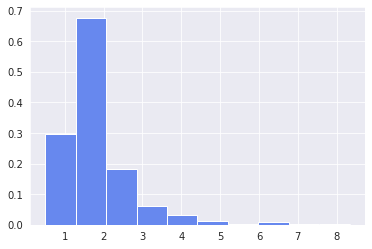

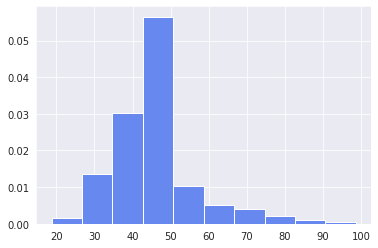

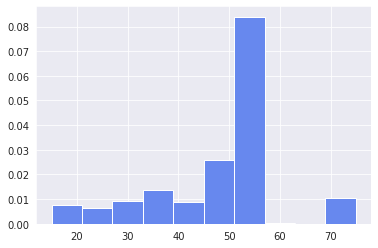

In [12]:
for i in data.columns:
    plt.figure()
    plt.hist(data[i],density=True)

In [13]:
data_corr = data.corr()
data_corr

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
outcome,1.000000,0.064270,-0.022324,-0.053072,-0.072635,0.101238,-0.014590,-0.050359,-0.099244,-0.060752,-0.053185,-0.108856,-0.047223,0.129293,-0.132362,-0.087077,0.116603,-0.092496,-0.070938,-0.171332,-0.016786,-0.024182,0.013365,-0.031810,0.034065,0.148204,0.208399,-0.088413,0.068380,-0.022925,-0.131499,0.139974,0.144098,0.120970,0.070958,0.045958,0.202917,0.032225,0.136696,-0.065585,-0.183164,0.060355,0.229427,0.074202,-0.140229,-0.222608,0.215838,-0.046354,-0.024298
age,0.064270,1.000000,0.081705,-0.349862,0.177060,0.291003,0.037594,-0.089103,0.015099,-0.094543,0.114893,0.112246,-0.004048,-0.209241,-0.028960,-0.343134,-0.044003,-0.211713,0.057754,-0.249722,-0.019583,-0.053557,0.077017,0.016170,0.083819,-0.046301,0.011029,-0.037388,0.119582,-0.067794,-0.119596,0.096551,0.099052,0.054536,-0.022092,-0.081163,0.106833,-0.092158,-0.057468,0.104325,-0.009950,0.138015,-0.004426,0.088315,0.095186,-0.061130,0.005678,-0.109703,0.054400
gendera,-0.022324,0.081705,1.000000,0.022226,0.008776,-0.036957,-0.079159,-0.035943,0.080868,0.081415,-0.037522,-0.098146,-0.069055,-0.013628,0.084345,-0.133641,-0.042068,-0.012786,0.024066,-0.138575,-0.114740,-0.096151,-0.048262,-0.066879,-0.020630,0.005900,-0.005115,0.102030,0.018489,-0.030528,0.028774,-0.072182,-0.072055,0.001770,0.023439,-0.133094,-0.094694,0.048415,-0.059761,0.024527,0.061188,0.003008,-0.048100,-0.033931,-0.065795,0.036389,0.007708,0.073970,0.171936
BMI,-0.053072,-0.349862,0.022226,1.000000,-0.028931,-0.107411,-0.057499,0.141195,-0.018907,0.022983,-0.016144,-0.039121,0.011676,-0.012695,0.095751,0.137334,-0.039917,0.079736,-0.164173,0.258415,0.120560,0.148846,-0.118388,-0.105215,-0.082236,0.050153,-0.057894,-0.045751,-0.076025,0.031253,0.070476,-0.007735,-0.004470,-0.167267,0.034336,0.001740,-0.019643,0.118237,0.037063,0.044729,0.085907,-0.166986,-0.112026,0.015523,-0.105224,0.263997,-0.079839,0.284118,0.053917
hypertensive,-0.072635,0.177060,0.008776,-0.028931,1.000000,0.006757,0.010040,0.129649,-0.005795,-0.043798,0.225965,0.193266,0.015029,-0.128110,0.142344,-0.022783,-0.055710,0.016209,0.061880,-0.034639,-0.028032,-0.008640,-0.020672,0.019514,-0.035798,-0.098594,0.029023,0.026693,0.006346,-0.057189,0.016649,-0.030260,-0.034582,0.007977,0.030559,0.077294,0.074039,0.051655,-0.014213,0.033276,0.080002,-0.018294,0.067535,0.000580,0.020653,0.011035,-0.019556,-0.007092,0.012697
atrialfibrillation,0.101238,0.291003,-0.036957,-0.107411,0.006757,1.000000,-0.003449,-0.013032,-0.097414,-0.058864,0.050439,0.046120,-0.046189,-0.007047,-0.118018,-0.072102,-0.029758,-0.156367,0.058226,-0.153664,0.022021,0.016521,-0.028576,-0.080776,0.011260,0.073495,0.098511,-0.029558,0.114265,-0.073756,-0.113538,0.312749,0.306535,0.084345,0.007167,0.022110,0.108165,-0.029880,-0.017644,-0.026506,0.019468,0.023312,0.049712,0.067448,0.041556,-0.071813,0.043997,-0.088971,0.011168
CHD with no MI,-0.014590,0.037594,-0.079159,-0.057499,0.010040,-0.003449,1.000000,0.008831,0.043327,0.046724,0.047766,0.025835,0.004162,-0.016652,-0.084818,-0.005160,0.007503,-0.061600,0.056612,0.012823,0.003097,0.000317,0.016401,0.019619,0.008009,0.041779,-0.036210,-0.018511,0.038287,-0.040615,-0.029835,-0.011042,-0.011516,0.009881,-0.001063,-0.011279,0.026090,0.053599,0.008643,-0.071097,0.021363,-0.056855,0.024763,0.016926,0.061268,-0.009349,0.010017,-0.060049,-0.146272
diabetes,-0.050359,-0.089103,-0.035943,0.141195,0.129649,-0.013032,0.008831,1.000000,0.061274,0.005329,0.133406,0.188646,-0.074879,-0.134587,0.129911,-0.054841,-0.

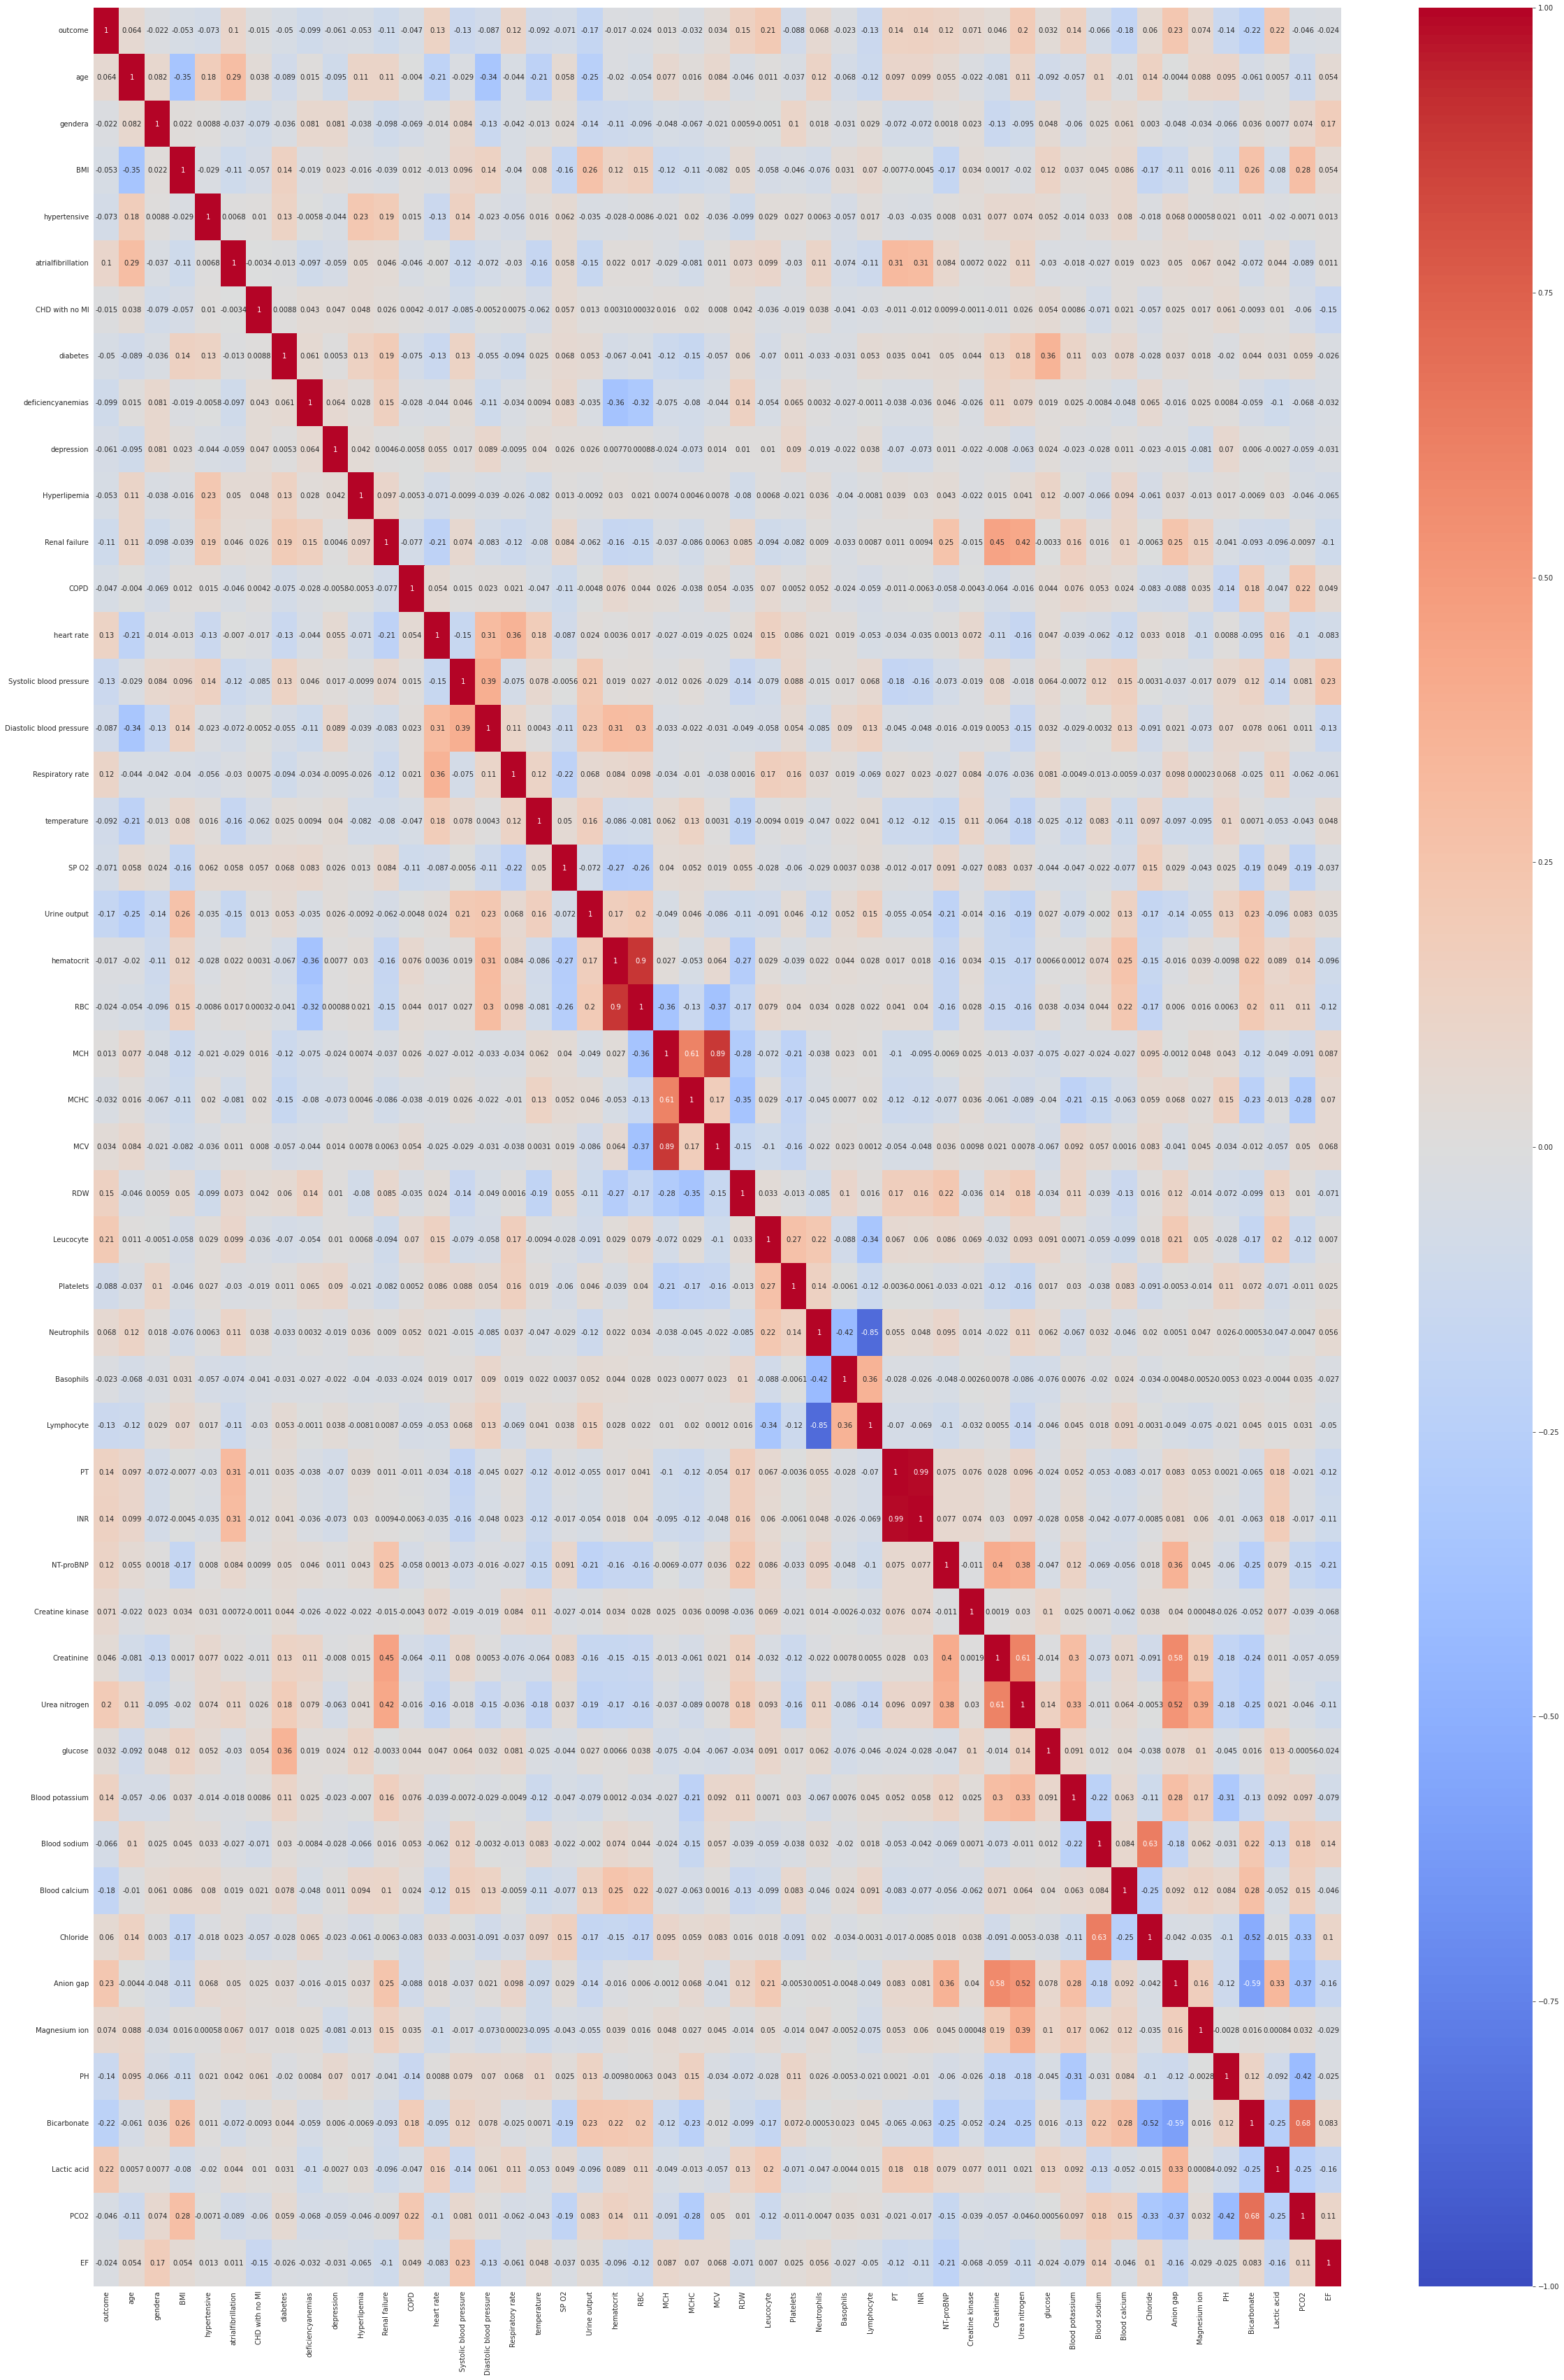

In [14]:
plt.figure(figsize=(40,60))
sns.heatmap(data_corr,annot = True, cmap = 'coolwarm' ,vmin=-1)

In [15]:
data_corr[np.absolute(data_corr['outcome']) > 0.1]['outcome']

outcome                    1.000000
atrialfibrillation         0.101238
Renal failure             -0.108856
heart rate                 0.129293
Systolic blood pressure   -0.132362
Respiratory rate           0.116603
Urine output              -0.171332
RDW                        0.148204
Leucocyte                  0.208399
Lymphocyte                -0.131499
PT                         0.139974
INR                        0.144098
NT-proBNP                  0.120970
Urea nitrogen              0.202917
Blood potassium            0.136696
Blood calcium             -0.183164
Anion gap                  0.229427
PH                        -0.140229
Bicarbonate               -0.222608
Lactic acid                0.215838
Name: outcome, dtype: float64

In [16]:
data[data['outcome'] == 1]

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
16,1,83,2,30.188278,1,0,0,0,1,0,0,1,0,83.692308,157.289474,58.236842,15.652174,36.922222,99.815789,1495.000000,23.654545,2.648571,29.828571,33.185714,90.142857,15.414286,10.742857,304.428571,91.400000,0.100000,4.900000,12.550000,1.075000,33773.0,50.000000,2.050000,54.700000,134.000000,4.790909,132.818182,8.888889,94.700000,14.500000,2.055556,7.368333,28.800000,0.700000,54.916667,30
21,1,78,2,37.851434,1,0,0,1,0,0,0,0,0,76.384615,95.444444,60.259259,21.750000,36.120370,94.384615,1766.000000,34.162500,4.217500,26.012500,32.125000,81.000000,19.062500,4.837500,172.250000,70.900000,0.500000,17.900000,14.200000,1.200000,24440.0,24.000000,1.300000,32.727273,88.000000,3.481818,142.818182,8.320000,107.454546,12.545455,2.010000,7.333333,26.363636,0.750000,52.000000,55
27,1,89,1,30.188278,1,1,0,0,0,0,0,0,0,90.444444,106.941176,40.764706,24.058824,36.288889,96.117647,1370.000000,29.392857,3.296000,29.560000,33.370000,88.600000,18.390000,5.900000,330.700000,81.866667,0.500000,15.200000,13.042857,1.142857,2456.0,22.000000,1.211111,24.888889,105.000000,4.066667,142.555556,7.400000,111.555556,12.333333,1.862500,7.440000,22.666667,0.800000,35.000000,55
37,1,89,2,19.980509,1,1,1,0,1,0,0,0,0,101.035714,117.785714,48.857143,18.285714,35.365079,96.964286,998.000000,33.100000,3.463333,30.983333,32.400000,95.666667,16.883333,11.450000,557.666667,80.113544,0.405569,12.233024,17.500000,1.600000,11192.0,20.000000,0.966667,19.666667,102.800000,4.166667,143.166667,8.816667,110.833333,16.333333,1.900000,7.302000,20.000000,0.825000,39.200000,55
40,1,81,1,30.188278,0,1,0,0,1,0,0,1,0,80.666667,102.500000,46.307692,20.718750,36.962963,99.739130,1005.000000,28.925000,3.242500,29.400000,32.925000,89.250000,19.275000,12.225000,127.500000,86.200000,0.533333,7.266667,39.225000,4.125000,22680.0,485.000000,4.133333,93.833333,73.857143,5.866667,130.833333,9.350000,100.833333,20.200000,2.475000,7.244000,15.800000,0.842857,43.500000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1,43,2,19.682579,0,0,0,0,0,0,0,0,0,84.067797,90.547619,56.404762,23.232143,36.677778,97.586207,0.000000,20.800000,2.030000,28.300000,32.800000,86.000000,17.200000,0.100000,13.000000,10.000000,0.405569,60.000000,23.000000,2.200000,14492.0,246.778456,1.450000,49.500000,127.666667,6.566667,137.666667,8.200000,103.666667,22.500000,2.200000,7.090000,17.000000,6.500000,54.000000,30
1145,1,80,1,32.582245,1,1,0,1,0,0,0,0,0,61.200000,112.000000,54.750000,17.600000,36.000000,96.578947,365.000000,25.488889,2.823333,29.322222,32.533333,90.444444,17.033333,5.833333,354.222222,80.113544,0.405569,12.233024,65.618182,7.390909,7367.0,250.500000,3.145455,80.636364,195.000000,4.345455,141.181818,8.387500,102.090909,20.000000,2.555556,7.378532,23.454545,1.853426,45.535382,55
1147,1,66,2,18.996620,0,0,0,0,0,0,0,0,0,65.518519,112.086956,40.086957,21.740741,35.611111,97.814815,400.000000,24.640000,2.734000,29.540000,32.790000,90.200000,14.470000,9.840000,376.600000,92.200000,0.200000,2.733333,44.833333,4.716667,8436.0,246.778456,0.862500,37.125000,91.666667,4.300000,137.777778,8.666667,94.444444,8.750000,2.371429,7.370000,38.500000,1.853426,69.000000,55
1164,1,76,1,26.197235,0,1,0,0,0,0,0,0,0,90.000000,103.440000,58.560000,18.428571,36.293650,98.964286,1825.000000,33.793333,3.584000,31.820000,33.650000,94.900000,17.540000,5.760000,139.900000,82.033333,0.466

In [17]:
data[data['outcome'] == 0]

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.000000,26.272727,2.960000,28.250000,31.520000,89.900000,16.220000,7.650000,305.100000,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230000,21.166667,0.500000,40.000000,55
1,0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.000000,30.780000,3.138000,31.060000,31.660000,98.200000,14.260000,12.740000,246.400000,80.113544,0.405569,12.233024,17.481057,1.625465,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225000,33.444444,0.500000,78.000000,55
2,0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.000000,27.700000,2.620000,34.320000,31.300000,109.800000,23.820000,5.480000,204.200000,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268000,30.571429,0.500000,71.500000,35
3,0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.000000,36.637500,4.277500,26.062500,30.412500,85.625000,17.037500,8.225000,216.375000,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370000,38.571429,0.600000,75.000000,55
4,0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.000000,29.933333,3.286667,30.666667,33.666667,91.000000,16.266667,8.833333,251.000000,80.113544,0.405569,12.233024,17.481057,1.625465,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250000,22.000000,0.600000,50.000000,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0,62,1,25.516870,1,1,0,1,0,1,1,1,0,100.125000,142.545455,69.681818,24.500000,37.055556,94.130435,1899.276512,33.628571,3.685714,27.842857,30.542857,91.142857,15.557143,7.742857,251.857143,81.550000,0.700000,10.650000,12.600000,1.200000,47985.0,129.500000,8.385714,48.000000,120.000000,5.557143,136.714286,10.271429,94.428571,20.142857,2.714286,7.378532,27.714286,1.853426,45.535382,40
1173,0,78,1,25.822710,0,1,0,1,0,1,1,1,0,114.640000,101.222222,51.888889,18.958333,35.972222,93.526316,1899.276512,28.715789,3.270000,29.772727,33.263636,89.545455,18.672727,22.309091,283.000000,84.580000,0.800000,7.700000,18.721429,1.692857,48044.0,34.000000,1.900000,34.500000,138.333333,4.520000,135.680000,10.523529,101.720000,18.160000,2.012500,7.378532,20.480000,1.853426,45.535382,30
1174,0,85,2,23.891779,1,1,0,1,1,0,0,1,0,52.720000,137.791667,40.958333,18.680000,36.777778,98.800000,118.000000,27.685714,3.065714,26.900000,29.800000,90.285714,17.285714,9.228571,409.285714,65.900000,0.400000,24.400000,13.000000,1.100000,50976.0,98.000000,2.728571,30.428571,99.000000,4.100000,136.000000,8.466667,97.285714,14.000000,2.028571,7.378532,28.857143,1.853426,45.535382,55
1175,0,79,2,35.288554,0,0,1,1,1,1,1,1,0,93.400000,94.416667,62.458333,22.040000,36.422222,99.560000,2585.000000,33.537500,3.446250,31.150000,32.012500,97.375000,16.000000,6.062500,307.375000,79.850000

**6-Train Test Split**

In [18]:
X = data.drop('outcome',axis=1)
y = data['outcome']

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.3 , random_state=101)

In [20]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((823, 48), (354, 48), (823,), (354,))

In [21]:
print("Before Smote")
y.value_counts()

Before Smote


0    1018
1     159
Name: outcome, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
sm = SMOTE(random_state=101)
X_sm, y_sm = sm.fit_resample(X, y)

In [24]:
print("After Smote")
y_sm.value_counts()

After Smote


1    1018
0    1018
Name: outcome, dtype: int64

In [25]:
result_acc = []

**7-Baseline Logistic Regression**

In [26]:
#Pipelines
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),   #Step1 - normalize data
    ('clf', LogisticRegression())       #Step2 - classifier
])
pipeline.steps

[('scaler', StandardScaler()), ('clf', LogisticRegression())]

In [28]:
from sklearn.model_selection import cross_validate

scores = cross_validate(pipeline, X_train, y_train)
scores

{'fit_time': array([0.03394294, 0.0261116 , 0.02506995, 0.02364564, 0.02437901]),
 'score_time': array([0.00348926, 0.00335813, 0.00331211, 0.00349069, 0.00342774]),
 'test_score': array([0.88484848, 0.83636364, 0.85454545, 0.89634146, 0.85365854])}

In [29]:
scores['test_score'].mean()

0.8651515151515152

**8-Finding an "optimal" 'k' for K-Means**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
k = range(1,30)
error_rate = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

Text(0.5, 1.0, 'Error Rate vs K')

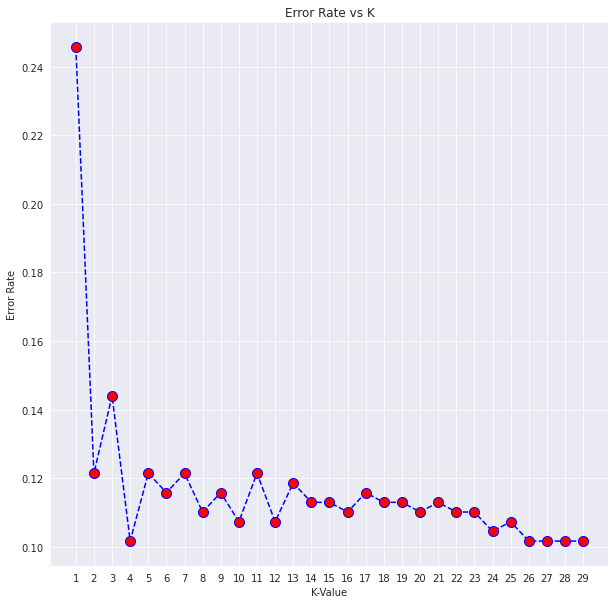

In [32]:
plt.figure(figsize=(10,10))
plt.plot(k,error_rate,color='b',ls='--',marker='o',markerfacecolor='red',markersize=10)
plt.xticks(k)
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K')

**9-Pipelining Multiple Classifiers**

In [33]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=13))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for k, v in scores.items():
            print(k,' mean ', v.mean())

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.026159143447875975
score_time  mean  0.0033296585083007813
test_score  mean  0.8651515151515152
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.025566577911376953
score_time  mean  0.008381128311157227
test_score  mean  0.8566149297856616
---------------------------------
KNeighborsClassifier(n_neighbors=13)
-----------------------------------
fit_time  mean  0.00719609260559082
score_time  mean  0.012902450561523438
test_score  mean  0.8566223207686623
---------------------------------
DecisionTreeClassifier()
-----------------------------------
fit_time  mean  0.031894493103027347
score_time  mean  0.002601909637451172
test_score  mean  0.8055728011825574
---------------------------------
RandomForestClassifier()
-----------------------------------
fit_time  mean  0.293154239654541
score_time  mean  0.012952947616577148
test_score 

In [34]:
from sklearn.metrics import accuracy_score , f1_score , roc_auc_score

**10-XG-BOOST**

In [35]:
#from xgboost import XGBClassifier
#xgb = XGBClassifier(learning_rate = 0.005)
#xgb.fit(X_train,y_train)
#y_pred = xgb.predict(X_test)


#from sklearn.metrics import accuracy_score
#print(accuracy_score(y_test,y_pred))

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, plot_confusion_matrix, auc

In [37]:
XGB = XGBClassifier(max_depth = 1)
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb, y_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
result_acc.append(acc_xgb)
print("RESULT")
print("XGBoost Model Acc : ",acc_xgb)
print("XGBoost Model Cm : ",cm_xgb)

RESULT
XGBoost Model Acc :  0.9124293785310734
XGBoost Model Cm :  [[313  26]
 [  5  10]]


In [38]:
print(XGB.feature_importances_)

[0.02067667 0.         0.02128297 0.         0.         0.
 0.         0.02757949 0.         0.         0.02766989 0.
 0.03574148 0.02665464 0.         0.0348788  0.         0.03086642
 0.0750979  0.         0.         0.         0.         0.02090103
 0.04447995 0.05241449 0.03543045 0.         0.02653529 0.05544824
 0.         0.         0.         0.02648041 0.         0.04564272
 0.         0.         0.02867554 0.06008141 0.         0.07432111
 0.03033603 0.05094038 0.07945071 0.04785678 0.02055717 0.        ]


In [40]:
import numpy as np # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy

from scipy import stats
from scipy.stats import norm, skew, boxcox
from collections import Counter

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, plot_confusion_matrix, auc
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

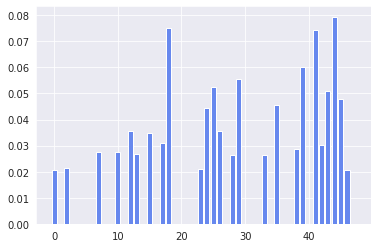

In [41]:
pyplot.bar(range(len(XGB.feature_importances_)), XGB.feature_importances_)
pyplot.show()

**11-LGBM**

In [43]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)


In [44]:
print(accuracy_score(y_test,y_pred))
print('F1-score: ',f1_score(y_test,y_pred))
print('Roc_Auc_Score: ',roc_auc_score(y_test,y_pred))
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

0.9096045197740112
F1-score:  0.3846153846153846
Roc_Auc_Score:  0.6294549266247379
LightGBM Model accuracy score: 0.9096


**Catboost**

In [45]:
!pip install catboost


     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [48]:
from catboost import CatBoostClassifier, Pool
best_params = {'bagging_temperature': 0.8,
               'depth': 5,
               'iterations': 500,
               'l2_leaf_reg': 30,
               'learning_rate': 0.05,
               'random_strength': 0.8}

model_cat_boost = CatBoostClassifier(
        **best_params,
        loss_function='Logloss',
        eval_metric='Accuracy',         
        nan_mode='Min',
        verbose=False
    )

model_cat_boost.fit(
        X_train, y_train,
        verbose_eval=100,
        early_stopping_rounds=50,
        eval_set=(X_test, y_test),
        use_best_model=False,
        plot=True
)

y_pred_cat_boost = model_cat_boost.predict(X_test)

cm_cat_boost = confusion_matrix(y_pred_cat_boost, y_test)
acc_cat_boost = accuracy_score(y_test, y_pred_cat_boost)
result_acc.append(acc_cat_boost)
print("RESULT")
print("Cat Boost Model Acc : ",acc_cat_boost)
print("Cat Boost Model Cm : ",cm_cat_boost) 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8517618	test: 0.8983051	best: 0.8983051 (0)	total: 71.1ms	remaining: 35.5s
100:	learn: 0.8991495	test: 0.9265537	best: 0.9265537 (85)	total: 2.18s	remaining: 8.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9322033898
bestIteration = 131

RESULT
Cat Boost Model Acc :  0.9322033898305084
Cat Boost Model Cm :  [[318  24]
 [  0  12]]


**Conclusion**

In [49]:
results=pd.DataFrame(columns=['score'])
results.loc['X-Gboost']=[acc_xgb]
results.loc['Cat-boost']=[acc_cat_boost]
results.loc['LightGBM']=[accuracy]

In [50]:
results.sort_values('score',ascending=False).style.background_gradient(cmap='Greens',subset=['score'])

,score
Cat-boost,0.932203
X-Gboost,0.912429
LightGBM,0.909605
